<a href="https://colab.research.google.com/github/mikeninerbravog/POC_ML_GradientBoosting/blob/master/POC_ML_GradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install numpy pandas scikit-learn matplotlib

🔍 Erro Quadrático Médio (MSE): 3153363212.76
📉 Raiz do Erro Quadrático Médio (RMSE): 56154.81
📊 MSE Relativo (% do preço médio): 0.3691%
📈 R² Score: 0.9699


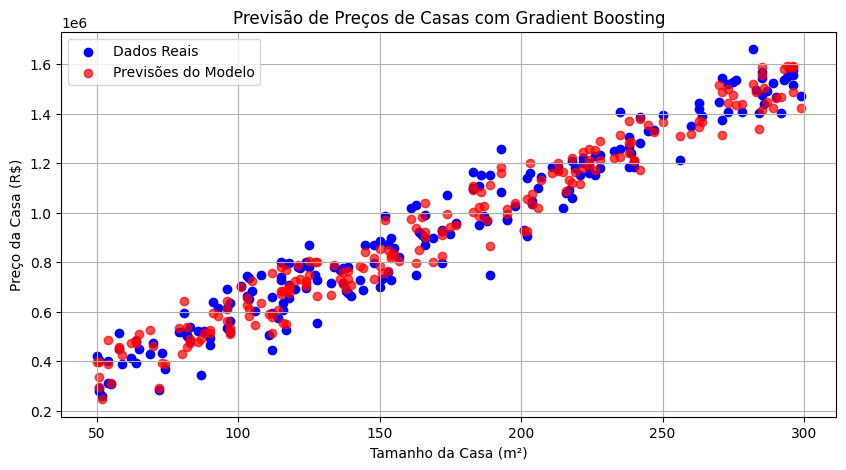

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 🔹 1. Gerando dados fictícios
np.random.seed(420)

n_samples = 1000  # Número de casas

# Características das casas
tamanho_m2 = np.random.randint(50, 300, n_samples)  # Tamanho da casa (m²)
quartos = np.random.randint(1, 6, n_samples)        # Número de quartos (1 a 5)
garagem = np.random.randint(0, 3, n_samples)        # Número de vagas na garagem (0 a 2)
idade_imovel = np.random.randint(0, 50, n_samples)  # Idade do imóvel em anos (0 a 50)
cidade_grande = np.random.randint(0, 2, n_samples)  # 0 = Pequena, 1 = Grande

# Criando preços fictícios
preco_casa = (
    tamanho_m2 * 5000                         # Cada metro quadrado vale 5000
    + quartos * 20000                         # Cada quarto adiciona 20.000 ao preço
    + garagem * 15000                         # Cada vaga de garagem adiciona 15.000
    - idade_imovel * 2000                     # Imóveis mais antigos valem menos
    + cidade_grande * 100000                  # Cidade grande adiciona 100.000 ao preço
    + np.random.normal(0, 50000, n_samples)   # Ruído aleatório para variação realista
)

# Criando um DataFrame
df = pd.DataFrame({
    "Tamanho_m2": tamanho_m2,
    "Quartos": quartos,
    "Garagem": garagem,
    "Idade_Imovel": idade_imovel,
    "Cidade_Grande": cidade_grande,
    "Preco_Casa": preco_casa
})

# 🔹 2. Separando os dados em treino e teste
X = df.drop(columns=["Preco_Casa"])
y = df["Preco_Casa"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 3. Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 4. Treinando o modelo Gradient Boosting
modelo = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)
modelo.fit(X_train_scaled, y_train)

# 🔹 5. Fazendo previsões
y_pred = modelo.predict(X_test_scaled)

# 🔹 6. Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Raiz quadrada do MSE
media_precos = np.mean(y_test)  # Média dos preços das casas

mse_relativo = (mse / (media_precos ** 2)) * 100  # Corrigido para escala percentual

print(f"🔍 Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"📉 Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"📊 MSE Relativo (% do preço médio): {mse_relativo:.4f}%")
print(f"📈 R² Score: {r2:.4f}")


# 🔹 7. Visualizando os resultados
plt.figure(figsize=(10, 5))
plt.scatter(X_test["Tamanho_m2"], y_test, color="blue", label="Dados Reais")
plt.scatter(X_test["Tamanho_m2"], y_pred, color="red", label="Previsões do Modelo", alpha=0.7)
plt.xlabel("Tamanho da Casa (m²)")
plt.ylabel("Preço da Casa (R$)")
plt.title("Previsão de Preços de Casas com Gradient Boosting")
plt.legend()
plt.grid(True)
plt.show()


**Explicando um dos resultados obtidos:**

Podem variar, de acordo com os dados que foram informados

- 🔍 Erro Quadrático Médio (MSE): 3626484116.12
- 📉 Raiz do Erro Quadrático Médio (RMSE): 60220.30
- 📊 MSE Relativo (% do preço médio): 0.3983%
- 📈 R² Score: 0.9699

Agora **o MSE Relativo está correto (0.3983%)**, o que significa que **o erro médio representa apenas 0.3983% do preço médio das casas**! 🚀🔥  

Isso indica que o modelo **tem uma precisão excelente**, pois o erro médio é **menor que 0.5% do valor real** das casas.

---

### **📊 O Que Isso Significa na Prática?**
✅ **O RMSE (R$ 60.220,30) indica o erro médio absoluto das previsões.**  
✅ **O MSE Relativo de 0.3983% mostra que o erro é extremamente pequeno em relação ao preço médio das casas.**  
✅ **O R² Score de 0.9699 confirma que o modelo explica quase 97% da variação nos preços.**  

📌 **Conclusão:** **Este modelo está muito preciso!**

### **Explicando o R² Score para uma criança de 10 anos**  

Imagine que você está tentando **adivinhar quantos doces estão dentro de um pote**. Você pode **chutar aleatoriamente**, ou **usar pistas**, como o tamanho do pote e quantos doces cabem em cada camada.  

Agora, pense que um **computador também tenta adivinhar** quantos doces há no pote, usando um modelo de inteligência artificial. O **R² Score** (R ao quadrado) é um número que **mede o quão bom o computador foi nesse palpite**.  

---

### **Como funciona o R² Score?**  
📌 **Se o R² Score for 1.0**, significa que o computador **acertou todas as previsões perfeitamente**. Ele sabe exatamente quantos doces há no pote.  

📌 **Se o R² Score for 0.0**, significa que o computador **não fez um palpite melhor do que alguém chutando aleatoriamente**. Ele não aprendeu nada útil.  

📌 **Se o R² Score for negativo**, significa que o computador fez previsões **piores do que um chute aleatório**. Ele está completamente perdido!  

---

### **Exemplo com doces no pote**
1️⃣ Se o pote tem **100 doces**, e o computador prevê **98 doces**, o **R² Score será alto**, porque o erro foi pequeno.  
2️⃣ Se o computador prever **50 doces**, o **R² Score será baixo**, pois ele errou muito.  
3️⃣ Se o computador prever **-20 doces** (o que não faz sentido), o **R² Score será negativo**, indicando que algo está errado.  

---

### **Resumo Simples**
🔹 **O R² Score mede o quão bem um modelo de IA faz previsões**.  
🔹 **1.0 é perfeito**, **0.0 é como chutar aleatoriamente**, e **negativo significa que está muito errado**.  
🔹 Quanto **mais perto de 1**, **melhor** a previsão do modelo.  

### **Explicando o Erro Quadrático Médio (MSE) para uma criança de 10 anos**  

Imagine que você está jogando **basquete** e tentando acertar a bola na cesta. Cada vez que você joga, a bola pode cair **perto ou longe** da cesta. O **Erro Quadrático Médio (MSE)** é uma forma de **medir o quanto você errou** em cada arremesso!  

---

### **Como funciona o MSE?**
📌 Se você sempre **acerta a cesta**, o **MSE será 0** (sem erro nenhum).  
📌 Se você errar **um pouco**, o **MSE será pequeno**.  
📌 Se você errar **muito e jogar a bola para o lado errado**, o **MSE será alto**.  

O MSE funciona da mesma forma para um **modelo de inteligência artificial**:  
- Ele tenta prever algo (como o **preço de uma casa**).  
- Depois, comparamos a previsão com o valor verdadeiro.  
- Quanto **maior o erro**, maior o **MSE**.  

---

### **Exemplo com doces**
Imagine que há **100 doces no pote**, e o computador tenta adivinhar:

| Previsão do Computador | Erro (Diferença) | Erro ao Quadrado |
|----------------------|-----------------|-----------------|
| 110 doces           | +10              | 100             |
| 90 doces            | -10              | 100             |
| 80 doces            | -20              | 400             |

📌 **Passo 1**: Pegamos a diferença entre a previsão e o valor real.  
📌 **Passo 2**: Elevamos ao quadrado (para não termos erros negativos).  
📌 **Passo 3**: Somamos tudo e calculamos a média.  

Se o **MSE for alto**, significa que o modelo **errou bastante**. Se for **próximo de 0**, significa que as previsões foram **muito boas**!  

---

### **Resumo Simples**
🔹 O **MSE mede o erro do modelo**: quanto maior, pior a previsão.  
🔹 **Se o MSE for 0, significa que o modelo acertou perfeitamente!**  
🔹 Quanto **menor o MSE, melhor** a inteligência do modelo.  